# Bike Rentals

In [1]:
# importing libraries
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Data Exploration

In [2]:
# loadind the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# shape of training and testing data
train.shape, test.shape

((12980, 12), (4399, 11))

There are 12 columns in train dataset, whereas 11 in the test dataset. The missing column in the test dataset is the target variable, in the excel sheet, and we will train our model to predict that variable.

In [4]:
# printing first five rows
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 0:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 1:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 2:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 3:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 4:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0      81.0        0.0       3          13     16  
1      80.0        0.0       8          32     40  
2      80.0        0.0       5          27     32  
3      75.0        0.0       3          10     13  
4      75.0        0.0       0           1      1

In [5]:
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2012-06-30 1:00:00       3        0           0        3  26.24  28.790   
1  2012-06-30 2:00:00       3        0           0        2  26.24  28.790   
2  2012-06-30 3:00:00       3        0           0        2  26.24  28.790   
3  2012-06-30 4:00:00       3        0           0        2  25.42  27.275   
4  2012-06-30 5:00:00       3        0           0        1  26.24  28.790   

   humidity  windspeed  casual  registered  
0      89.0    15.0013       3          55  
1      89.0     0.0000       7          54  
2      89.0     0.0000       3          20  
3      94.0     0.0000       3          15  
4      89.0    11.0014       3           7

In [6]:
# columns in the dataset
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [8]:
# Data type of the columns
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [9]:
# looking for null values in train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12980 entries, 0 to 12979
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    12980 non-null  object 
 1   season      12980 non-null  int64  
 2   holiday     12980 non-null  int64  
 3   workingday  12980 non-null  int64  
 4   weather     12980 non-null  int64  
 5   temp        12980 non-null  float64
 6   atemp       12980 non-null  float64
 7   humidity    12980 non-null  float64
 8   windspeed   12980 non-null  float64
 9   casual      12980 non-null  int64  
 10  registered  12980 non-null  int64  
 11  count       12980 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 1.2+ MB


In [10]:
train.describe()

season       holiday    workingday       weather          temp  \
count  12980.000000  12980.000000  12980.000000  12980.000000  12980.000000   
mean       2.211479      0.027504      0.685978      1.426656     19.725422   
std        1.053046      0.163553      0.464143      0.647955      7.828902   
min        1.000000      0.000000      0.000000      1.000000      0.820000   
25%        1.000000      0.000000      0.000000      1.000000     13.120000   
50%        2.000000      0.000000      1.000000      1.000000     19.680000   
75%        3.000000      0.000000      1.000000      2.000000     26.240000   
max        4.000000      1.000000      1.000000      4.000000     40.180000   

              atemp      humidity     windspeed        casual    registered  \
count  12980.000000  12980.000000  12980.000000  12980.000000  12980.000000   
mean      23.112436     62.358552     13.141760     32.441757    135.136055   
std        8.552046     19.963696      8.325987     46.636228    131.921431   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       15.910000     47.000000      7.001500      3.000000     30.000000   
50%       23.485000     62.000000     12.998000     14.000000    103.000000   
75%       30.305000     79.000000     19.001200     42.000000    194.000000   
max       50.000000    100.000000     56.996900    367.000000    796.000000   

              count  
count  12980.000000  
mean     167.577812  
std      160.758887  
min        1.000000  
25%       35.000000  
50%      124.000000  
75%      245.000000  
max      957.000000

In [11]:
# looking for null values in test
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

## Univariate Analysis

We can infer that all of the variable in the dataset except datetime are numerical variables. Now Let's look at the distribution of our target variable, i.e. count. As it is a numerical variable, let us look at its distribution.

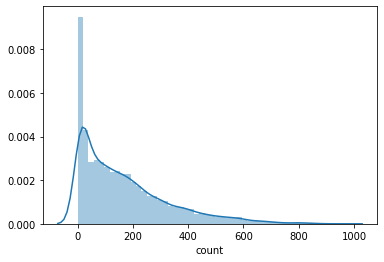

In [12]:
# distribution of count variable
sns.distplot(train["count"])

The distribution is skewed towards right and hence we can take log of the variable and see if the distribution becomes normal.

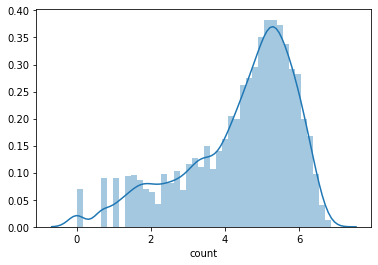

In [13]:
sns.distplot(np.log(train["count"]))

Now the distribution looks less skewed. Let's now explore the variables to have a better understanding of the dataset. We will first explore the variables individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most.

Let's first look at the distribution of registered variable to check the number of registered user rentals initiated.

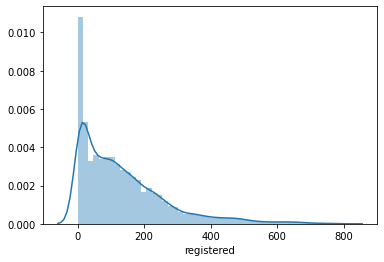

In [14]:
sns.distplot(train["registered"])

We can see that most of the registered rentals lies in the range of 0 to 200. The registered users at a particular time step will always be less than or equal to the demand (count) of that particular timestep. 

Let's now look at how correlated our numerical variables are. 

We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable.

## Bivariate Analysis

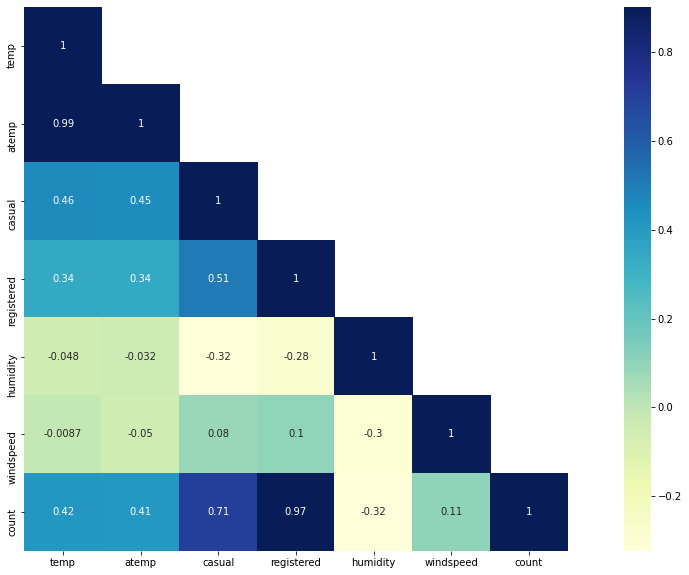

In [15]:
# looking at the correlation between numerical variables
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

Some of the inferences from the above correlation map are:

1. temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".
2. windspeed will not be really useful numerical feature and it is visible from it correlation value with "count"
3. Since "atemp" and "temp" has got strong correlation with each other, during model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.

There are no missing values in the test dataset as well. We can now move further and build our first model. Before that let's first extract some new features using the datetime variable. We can extract the date, hour, month.

In [16]:
# extracting date, hour and month from the datetime
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

You can also use to_datetime() function from pandas package to convert the date in datetime format and then extract features from it. 

Let's now build a linear regression model to get the predictions on the test data. We have to make the similar changes in test data as we have done for the training data.

In [17]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

Now our data is ready. Before making the model, we will create a validation set to validate our model. So, we will divide the train set into training and validation set. We will train the model on the training set and check its performance on the validation set. Since the data is time based, we will split it as per time. Let's take first 15 months for training and remaining 3 months in the validation set. 

In [18]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

* We will drop the datetime, date variable as we have already extracted features from these variables.
* We will also drop the atemp variable as we saw that it is highly correlated with the temp variable.

In [19]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

## Model Building

### Plotting a relationship

* It seems that `casual` + `registered` = `count` of that day. To verify this lets make a scatter plot.
* We can then drop all the unnecessary attributes in this case. More columns hurts the model more.

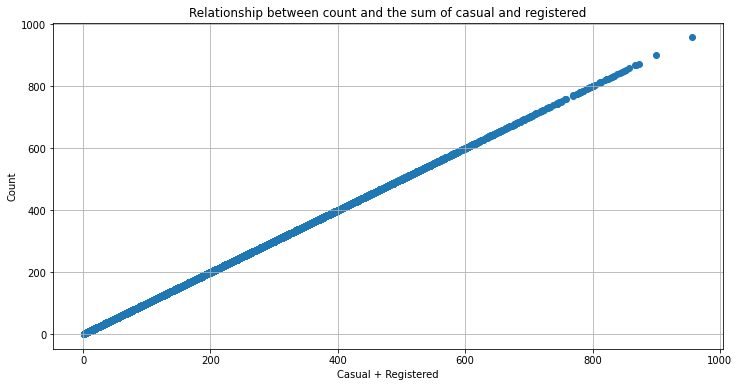

In [20]:
plt.figure(figsize=(12,6))
plt.scatter(x = train['casual'] + train['registered'], y = train['count'])
plt.grid(True)
plt.xlabel('Casual + Registered')
plt.ylabel('Count')
plt.title('Relationship between count and the sum of casual and registered')
plt.show()

In [21]:
# testing if casual + registered = count for all cases
(train['casual'] + train['registered'] == train['count']).all()

True

We can now train the model on just two parameters: `casual` and `registered`.

In [22]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'hour', 'month'],
      dtype='object')

In [23]:
train = train.drop(['season','holiday', 'workingday','weather', 'temp', 'humidity','windspeed','hour', 'month'],axis=1)
test = test.drop(['season','holiday', 'workingday','weather', 'temp', 'humidity','windspeed','hour', 'month'],axis=1)
training = training.drop(['season','holiday', 'workingday','weather', 'temp', 'humidity','windspeed','hour', 'month'],axis=1)
validation = validation.drop(['season','holiday', 'workingday','weather', 'temp', 'humidity','windspeed','hour', 'month'],axis=1)

In [24]:
training.columns

Index(['casual', 'registered', 'count'], dtype='object')

### Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
# initialize the linear regression model
lModel = LinearRegression()

We will remove the target variable from both the training and validation set and keep it in a separate variable. We saw in the visualization part that the target variable is right skewed, so we will take its log as well before feeding it to the model.

In [27]:
X_train = training.drop('count', axis = 1)
y_train = training['count']
X_val = validation.drop('count', axis = 1)
y_val = validation['count']

In [28]:
# checking the shape of X_train, y_train, X_val and y_val
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((10774, 2), (10774,), (2206, 2), (2206,))

In [29]:
# fitting the model on X_train and y_train
lModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now we have a trained linear regression model with us. We will now make prediction on the X_val set and check the performance of our model. Since the evaluation metric for this problem is RMSLE, we will define a model which will return the RMSLE score.

In [30]:
# making prediction on validation set
prediction = lModel.predict(X_val)

In [31]:
# defining a function which will return the rmsle score
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [32]:
rmsle(y_val, prediction)

1.7555758763705675e-15

In [33]:
# uncomment it to save the predictions from linear regression model and submit these predictions to generate score.

test_prediction = lModel.predict(test)

In [34]:
# creating a count column and saving the predictions in it

submission = pd.DataFrame()
submission['count'] = test_prediction

In [35]:
submission.to_csv('submission.csv', header=True, index=False)